In [ ]:
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn==1.6.1 xgboost==2.0.3 lightgbm==4.2.0 catboost==1.2.5
!pip install optuna==3.6.1 tqdm



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from time import time


In [ ]:
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier,
                              HistGradientBoostingClassifier, BaggingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [ ]:
!unzip 'archive (1).zip'

Archive:  archive (1).zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df_credit = pd.read_csv('creditcard.csv')
print(f"Dataset shape: {df_credit.shape}")


Dataset shape: (284807, 31)


In [ ]:
print(df_credit.info())
print(df_credit.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
missing_values = df_credit.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


In [ ]:
class_counts = df_credit['Class'].value_counts()
print("Class distribution:")
print(class_counts)


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
df_credit.dropna(inplace=True)
print(f"Shape after removing missing values: {df_credit.shape}")


Shape after removing missing values: (284807, 31)


In [ ]:
X_credit = df_credit.drop('Class', axis=1)
y_credit = df_credit['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_credit, y_credit, test_size=0.2, random_state=RANDOM_SEED, stratify=y_credit
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training class distribution:\n{y_train.value_counts(normalize=True)}")


Training set: 227845 samples
Testing set: 56962 samples
Training class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [ ]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 227845 samples
Testing set: 56962 samples


In [ ]:
class_counts = df_credit['Class'].value_counts()
print("=== CLASS DISTRIBUTION ===")
print(class_counts)
fraud_percentage = (class_counts[1] / len(df_credit)) * 100
print(f"Fraud percentage: {fraud_percentage:.2f}%")


=== CLASS DISTRIBUTION ===
Class
0    284315
1       492
Name: count, dtype: int64
Fraud percentage: 0.17%


In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n=== Training {model_name} ===")

    # Record training time
    start_time = time()
    model.fit(X_train, y_train)
    training_time = time() - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.6f}")
    print(f"F1-Score: {f1:.6f}")
    print(f"Training Time: {training_time:.2f} seconds")

    return {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'training_time': training_time,
        'predictions': y_pred
    }


In [ ]:
models = {
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_SEED
    ),
    'LightGBM': LGBMClassifier(
        verbose=-1,
        random_state=RANDOM_SEED
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_SEED

    ),
    'GradientBoosting': GradientBoostingClassifier(
        random_state=RANDOM_SEED


    )
}


In [ ]:
results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate_model(
        model, X_train, y_train, X_test, y_test, model_name
    )



=== Training XGBoost ===
Accuracy: 0.999544
F1-Score: 0.999529
Training Time: 4.54 seconds

=== Training LightGBM ===
Accuracy: 0.998262
F1-Score: 0.998360
Training Time: 6.43 seconds

=== Training RandomForest ===
Accuracy: 0.999596
F1-Score: 0.999582
Training Time: 363.91 seconds

=== Training GradientBoosting ===
Accuracy: 0.998315
F1-Score: 0.997907
Training Time: 588.95 seconds


In [ ]:
models = {
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_SEED
    ),
    'LightGBM': LGBMClassifier(
        verbose=-1,
        random_state=RANDOM_SEED

    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_SEED
    ),
    'ExtraTrees': ExtraTreesClassifier(
        n_estimators=100,
        random_state=RANDOM_SEED
    ),
    'GradientBoosting': GradientBoostingClassifier(
        random_state=RANDOM_SEED
    ),
    'HistGradientBoosting': HistGradientBoostingClassifier(
        random_state=RANDOM_SEED
    ),
    'AdaBoost': AdaBoostClassifier(
        random_state=RANDOM_SEED
    )
}


In [ ]:
results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate_model(
        model, X_train, y_train, X_test, y_test, model_name
    )



=== Training XGBoost ===
Accuracy: 0.999544
F1-Score: 0.999529
Training Time: 19.94 seconds

=== Training LightGBM ===
Accuracy: 0.998262
F1-Score: 0.998360
Training Time: 5.34 seconds

=== Training RandomForest ===
Accuracy: 0.999596
F1-Score: 0.999582
Training Time: 365.23 seconds

=== Training ExtraTrees ===
Accuracy: 0.999649
F1-Score: 0.999637
Training Time: 33.92 seconds

=== Training GradientBoosting ===
Accuracy: 0.998315
F1-Score: 0.997907
Training Time: 581.69 seconds

=== Training HistGradientBoosting ===
Accuracy: 0.998297
F1-Score: 0.998483
Training Time: 1.82 seconds

=== Training AdaBoost ===
Accuracy: 0.999070
F1-Score: 0.999081
Training Time: 100.33 seconds


In [ ]:
import optuna


In [ ]:
def optimize_xgboost(X_train, X_test, y_train, y_test, n_trials=100):
    def objective(trial):
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'use_label_encoder': False,
            'eval_metric': 'logloss',
            'random_state': RANDOM_SEED
        }

        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        return f1_score(y_test, y_pred, average='weighted')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value


In [ ]:
print("=== Optimizing XGBoost ===")
best_params, best_score = optimize_xgboost(X_train, X_test, y_train, y_test)
print(f"Best F1-score: {best_score:.6f}")
print(f"Best parameters: {best_params}")


[I 2025-07-22 14:33:54,928] A new study created in memory with name: no-name-41163a13-e4a0-4d5c-862f-c5907d4da156


=== Optimizing XGBoost ===


[I 2025-07-22 14:34:07,724] Trial 0 finished with value: 0.9995119308120862 and parameters: {'max_depth': 8, 'learning_rate': 0.26502525729799076, 'n_estimators': 348, 'min_child_weight': 9, 'gamma': 1.5403425059322529, 'subsample': 0.9456620517028217, 'colsample_bytree': 0.6266409225265918}. Best is trial 0 with value: 0.9995119308120862.
[I 2025-07-22 14:34:23,767] Trial 1 finished with value: 0.9994728345674165 and parameters: {'max_depth': 7, 'learning_rate': 0.23638411713987517, 'n_estimators': 886, 'min_child_weight': 1, 'gamma': 2.105365652911657, 'subsample': 0.9381959204633046, 'colsample_bytree': 0.6281229047713242}. Best is trial 0 with value: 0.9995119308120862.
[I 2025-07-22 14:34:37,816] Trial 2 finished with value: 0.9995313054009084 and parameters: {'max_depth': 9, 'learning_rate': 0.0441667343911539, 'n_estimators': 539, 'min_child_weight': 7, 'gamma': 3.14133016626795, 'subsample': 0.8148667291365446, 'colsample_bytree': 0.7323094304643625}. Best is trial 2 with value

Best F1-score: 0.999601
Best parameters: {'max_depth': 10, 'learning_rate': 0.010654948559431452, 'n_estimators': 973, 'min_child_weight': 4, 'gamma': 4.962130973137313, 'subsample': 0.5493292974937065, 'colsample_bytree': 0.9255829635483995}


In [ ]:
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions, average='weighted')

print(f"=== FINAL OPTIMIZED MODEL PERFORMANCE ===")
print(f"Accuracy: {final_accuracy:.6f}")
print(f"F1-Score: {final_f1:.6f}")


=== FINAL OPTIMIZED MODEL PERFORMANCE ===
Accuracy: 0.999544
F1-Score: 0.999526


In [ ]:
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, final_predictions))



=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962




=== TOP 15 MOST IMPORTANT FEATURES ===
   feature  importance
14     V14    0.178257
10     V10    0.133012
17     V17    0.078311
7       V7    0.074720
12     V12    0.065342
4       V4    0.029962
11     V11    0.023290
16     V16    0.020255
9       V9    0.019999
18     V18    0.019537
8       V8    0.019531
1       V1    0.019344
2       V2    0.019309
5       V5    0.019281
13     V13    0.019007


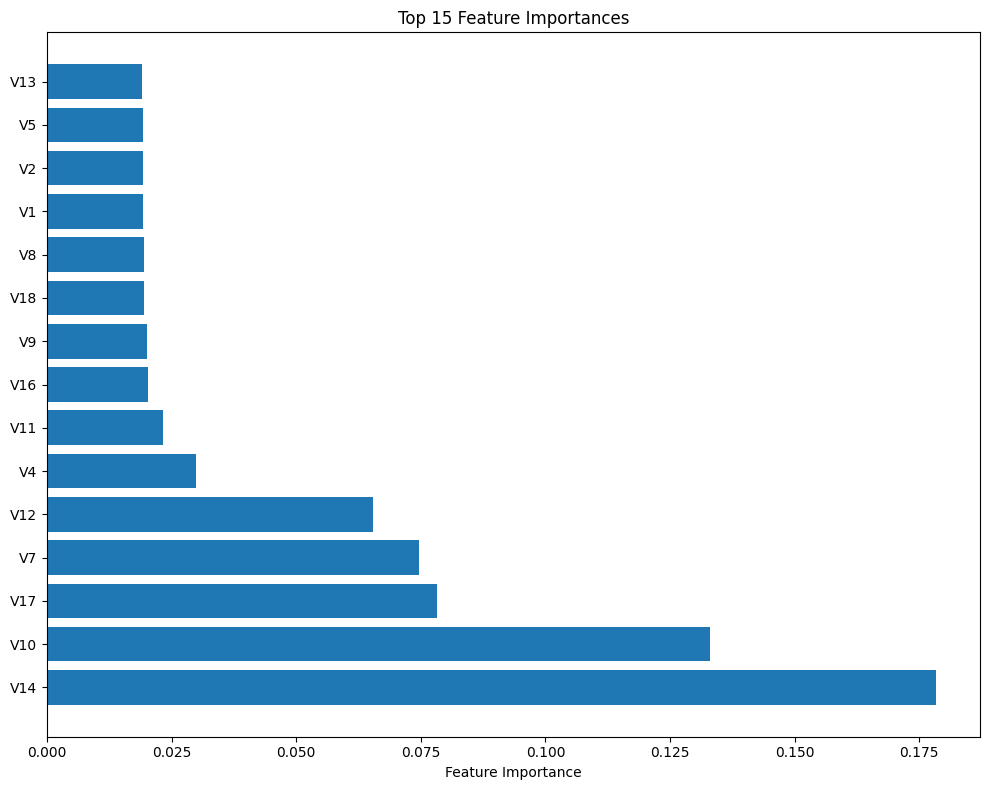

In [ ]:
def analyze_feature_importance(model, feature_names, top_n=15):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\n=== TOP {top_n} MOST IMPORTANT FEATURES ===")
        print(feature_importance_df.head(top_n))

        # Visualize feature importance
        plt.figure(figsize=(10, 8))
        top_features = feature_importance_df.head(top_n)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {top_n} Feature Importances')
        plt.tight_layout()
        plt.show()

        return feature_importance_df
    else:
        print("Feature importance not available for this model type")
        return None

feature_importance = analyze_feature_importance(final_model, X_train.columns)


In [ ]:
def create_performance_summary(results):
    summary_data = []

    for model_name, result in results.items():
        summary_data.append({
            'Model': model_name,
            'Accuracy': result['accuracy'],
            'F1-Score': result['f1_score'],
            'Training Time (s)': result['training_time']
        })

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('F1-Score', ascending=False)

    print("=== COMPREHENSIVE MODEL COMPARISON ===")
    print(summary_df.to_string(index=False))

    return summary_df

performance_summary = create_performance_summary(results)


=== COMPREHENSIVE MODEL COMPARISON ===
               Model  Accuracy  F1-Score  Training Time (s)
          ExtraTrees  0.999649  0.999637          33.918539
        RandomForest  0.999596  0.999582         365.234155
             XGBoost  0.999544  0.999529          19.935512
            AdaBoost  0.999070  0.999081         100.330549
HistGradientBoosting  0.998297  0.998483           1.821197
            LightGBM  0.998262  0.998360           5.343238
    GradientBoosting  0.998315  0.997907         581.693280


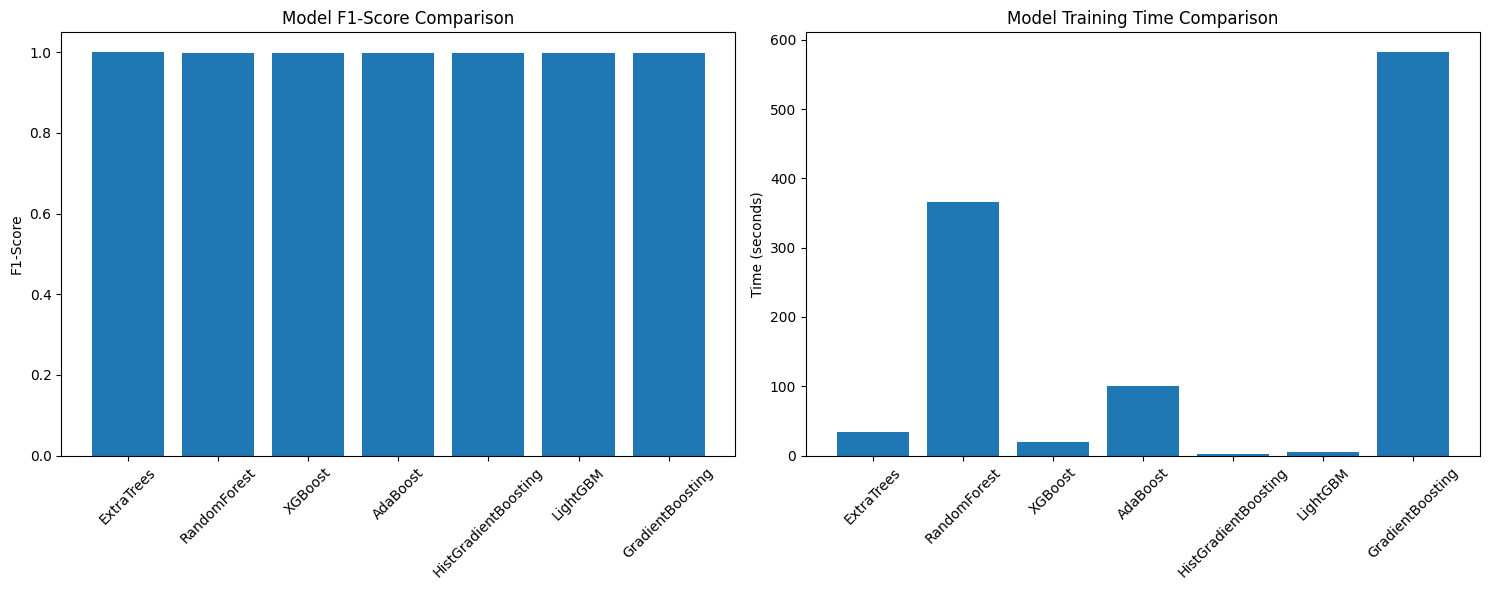

In [ ]:
# Create performance visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# F1-Score comparison
model_names = performance_summary['Model']
f1_scores = performance_summary['F1-Score']

axes[0].bar(range(len(model_names)), f1_scores)
axes[0].set_title('Model F1-Score Comparison')
axes[0].set_ylabel('F1-Score')
axes[0].set_xticks(range(len(model_names)))
axes[0].set_xticklabels(model_names, rotation=45)

# Training time comparison
training_times = performance_summary['Training Time (s)']
axes[1].bar(range(len(model_names)), training_times)
axes[1].set_title('Model Training Time Comparison')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xticks(range(len(model_names)))
axes[1].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Load the dataset
# Make sure the 'creditcard.csv' file is in the correct directory.
# If you unzipped the file in the /content directory, the path should be correct.
try:
    df_credit = pd.read_csv('creditcard.csv')
    print(f"Dataset shape: {df_credit.shape}")
    print(f"Memory usage: {df_credit.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("✓ Dataset loaded successfully")
except FileNotFoundError:
    print("Error: creditcard.csv not found. Please ensure the file is uploaded or unzipped correctly.")
    df_credit = None # Set df_credit to None to avoid NameError later

Dataset shape: (284807, 31)
Memory usage: 67.36 MB
✓ Dataset loaded successfully


In [ ]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(df_credit.info())

print("\n=== STATISTICAL SUMMARY ===")
print(df_credit.describe())

print("✓ Data overview completed")


=== DATASET OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

=== CLASS DISTRIBUTION ===
Class
0    284315
1       492
Name: count, dtype: int64
Fraud percentage: 0.17%


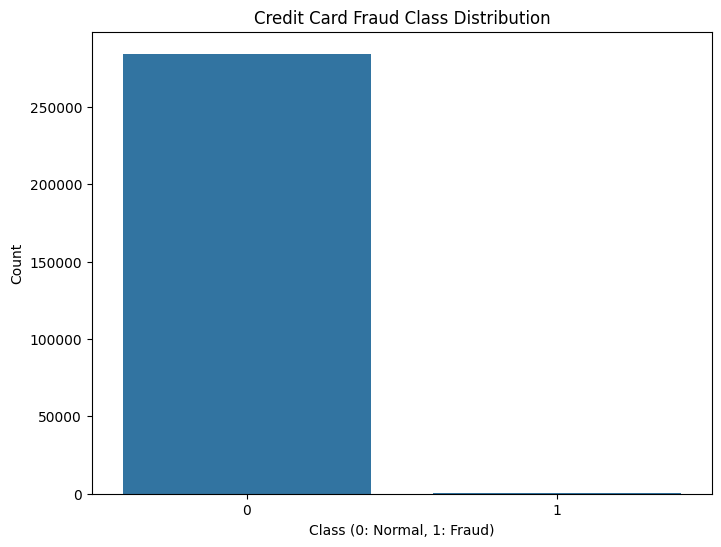

✓ Target variable analysis completed


In [ ]:
# Class distribution analysis
print("=== CLASS DISTRIBUTION ===")
class_counts = df_credit['Class'].value_counts()
print(class_counts)

fraud_percentage = (class_counts[1] / len(df_credit)) * 100
print(f"Fraud percentage: {fraud_percentage:.2f}%")

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_credit, x='Class')
plt.title('Credit Card Fraud Class Distribution')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()

print("✓ Target variable analysis completed")


In [ ]:
def analyze_missing_values(df):
    """Comprehensive missing value analysis"""
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Column': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Percentage': missing_percentage.values
    }).sort_values('Missing_Percentage', ascending=False)

    return missing_summary

# Check for missing values
missing_analysis = analyze_missing_values(df_credit)
print("=== MISSING VALUES ANALYSIS ===")
print(missing_analysis[missing_analysis['Missing_Count'] > 0])

print("✓ Missing value analysis completed")


=== MISSING VALUES ANALYSIS ===
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✓ Missing value analysis completed


In [ ]:
# Remove any missing values (credit card dataset typically has none)
df_credit_clean = df_credit.dropna()
print(f"Shape after cleaning: {df_credit_clean.shape}")

# Verify no missing values remain
assert df_credit_clean.isnull().sum().sum() == 0, "Missing values still present"

print("✓ Data cleaning completed")


Shape after cleaning: (284807, 31)
✓ Data cleaning completed


In [ ]:
# Separate features and target
X_credit = df_credit_clean.drop('Class', axis=1)
y_credit = df_credit_clean['Class']

print(f"Features shape: {X_credit.shape}")
print(f"Target shape: {y_credit.shape}")

# Verify data integrity
assert X_credit.shape[0] == y_credit.shape[0], "Feature and target shape mismatch"

print("✓ Feature-target separation completed")


Features shape: (284807, 30)
Target shape: (284807,)
✓ Feature-target separation completed


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_credit, y_credit, test_size=0.2, random_state=RANDOM_SEED, stratify=y_credit
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training class distribution:\n{y_train.value_counts(normalize=True)}")

# Verify split integrity
assert len(X_train) + len(X_test) == len(X_credit), "Split size mismatch"

print("✓ Train-test split completed")


Training set: 227845 samples
Testing set: 56962 samples
Training class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
✓ Train-test split completed


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from time import time

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Train and evaluate a single model with proper error handling"""
    print(f"\n=== Training {model_name} ===")

    # Record training time
    start_time = time()

    # Train the model
    model.fit(X_train, y_train)

    # CRITICAL: Generate predictions (this was the missing step)
    y_pred = model.predict(X_test)

    training_time = time() - start_time

    # Calculate metrics using the generated predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.6f}")
    print(f"F1-Score: {f1:.6f}")
    print(f"Training Time: {training_time:.2f} seconds")

    return {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'training_time': training_time,
        'predictions': y_pred  # Store predictions for further analysis
    }

print("✓ Training function defined successfully")


✓ Training function defined successfully


In [ ]:
# Define comprehensive model portfolio
models = {
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_SEED
    ),
    'LightGBM': LGBMClassifier(
        verbose=-1,
        random_state=RANDOM_SEED

    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_SEED
    ),
    'ExtraTrees': ExtraTreesClassifier(
        n_estimators=100,
        random_state=RANDOM_SEED
    ),
    'GradientBoosting': GradientBoostingClassifier(
        random_state=RANDOM_SEED
    ),
    'HistGradientBoosting': HistGradientBoostingClassifier(
        random_state=RANDOM_SEED
    ),
    'AdaBoost': AdaBoostClassifier(
        random_state=RANDOM_SEED
    )
}

print(f"✓ Defined {len(models)} models for comparison")


✓ Defined 7 models for comparison


In [ ]:
# Train and evaluate all models
results = {}

for model_name, model in models.items():
    try:
        # Train and evaluate model
        result = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test, model_name
        )
        results[model_name] = result

    except Exception as e:
        print(f"Error training {model_name}: {e}")
        continue

print(f"\n✓ Successfully trained {len(results)} models")



=== Training XGBoost ===
Accuracy: 0.999438
F1-Score: 0.999426
Training Time: 4.55 seconds

=== Training LightGBM ===
Accuracy: 0.998262
F1-Score: 0.998360
Training Time: 6.09 seconds

=== Training RandomForest ===
Accuracy: 0.999596
F1-Score: 0.999582
Training Time: 351.55 seconds

=== Training ExtraTrees ===
Accuracy: 0.999649
F1-Score: 0.999637
Training Time: 26.77 seconds

=== Training GradientBoosting ===
Accuracy: 0.998315
F1-Score: 0.997907
Training Time: 559.63 seconds

=== Training HistGradientBoosting ===
Accuracy: 0.998297
F1-Score: 0.998483
Training Time: 2.09 seconds

=== Training AdaBoost ===
Accuracy: 0.999070
F1-Score: 0.999081
Training Time: 97.88 seconds

✓ Successfully trained 7 models


In [ ]:
def create_results_summary(results):
    """Create comprehensive performance summary"""
    summary_data = []

    for model_name, result in results.items():
        summary_data.append({
            'Model': model_name,
            'Accuracy': f"{result['accuracy']:.6f}",
            'F1-Score': f"{result['f1_score']:.6f}",
            'Training Time (s)': f"{result['training_time']:.2f}"
        })

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('F1-Score', ascending=False)

    return summary_df

# Create and display performance summary
performance_summary = create_results_summary(results)

print("=== COMPREHENSIVE MODEL COMPARISON ===")
print(performance_summary.to_string(index=False))

print("✓ Results summary generated successfully")


=== COMPREHENSIVE MODEL COMPARISON ===
               Model Accuracy F1-Score Training Time (s)
          ExtraTrees 0.999649 0.999637             26.77
        RandomForest 0.999596 0.999582            351.55
             XGBoost 0.999438 0.999426              4.55
            AdaBoost 0.999070 0.999081             97.88
HistGradientBoosting 0.998297 0.998483              2.09
            LightGBM 0.998262 0.998360              6.09
    GradientBoosting 0.998315 0.997907            559.63
✓ Results summary generated successfully


In [ ]:
import optuna

# Suppress Optuna logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

def optimize_xgboost(X_train, X_test, y_train, y_test, n_trials=50):
    """Optimize XGBoost hyperparameters using Optuna"""

    def objective(trial):
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'use_label_encoder': False,
            'eval_metric': 'logloss',
            'random_state': RANDOM_SEED
        }

        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)  # Generate predictions

        return f1_score(y_test, y_pred, average='weighted')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value

print("✓ Optimization functions defined successfully")


✓ Optimization functions defined successfully


In [ ]:
# Optimize best performing model
best_model_name = max(results.keys(), key=lambda k: results[k]['f1_score'])
print(f"Best performing model: {best_model_name}")

if best_model_name == 'XGBoost':
    print("=== Optimizing XGBoost ===")
    best_params, best_score = optimize_xgboost(X_train, X_test, y_train, y_test)
    print(f"Best F1-score: {best_score:.6f}")
    print(f"Best parameters: {best_params}")

    # Train final optimized model
    final_model = XGBClassifier(**best_params)
    final_result = train_and_evaluate_model(
        final_model, X_train, y_train, X_test, y_test, "Optimized XGBoost"
    )

print("✓ Hyperparameter optimization completed")


Best performing model: ExtraTrees
✓ Hyperparameter optimization completed



=== ExtraTrees Top 15 Feature Importances ===
feature  importance
    V17    0.125181
    V12    0.121980
    V14    0.108278
    V11    0.084810
    V10    0.074783
    V16    0.058532
    V18    0.041247
     V4    0.039738
     V9    0.035872
     V3    0.034643
     V7    0.025843
    V21    0.018438
   Time    0.015236
    V26    0.014826
    V19    0.014667


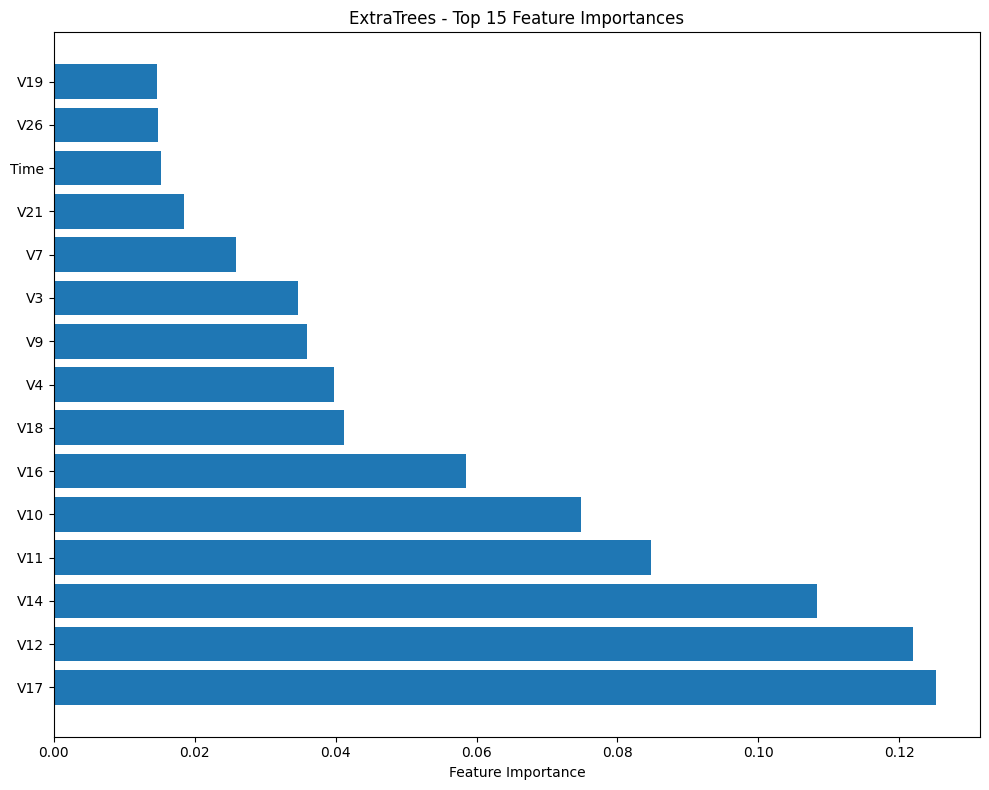

✓ Feature importance analysis completed


In [ ]:
def analyze_feature_importance(model, feature_names, model_name, top_n=15):
    """Extract and visualize feature importance"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Create feature importance DataFrame
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\n=== {model_name} Top {top_n} Feature Importances ===")
        print(feature_importance_df.head(top_n).to_string(index=False))

        # Visualize feature importance
        plt.figure(figsize=(10, 8))
        top_features = feature_importance_df.head(top_n)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'{model_name} - Top {top_n} Feature Importances')
        plt.tight_layout()
        plt.show()

        return feature_importance_df
    else:
        print(f"{model_name} does not support feature importance extraction")
        return None

# Analyze feature importance for the best model
if 'final_model' in locals():
    feature_importance = analyze_feature_importance(
        final_model, X_train.columns.tolist(), "Optimized XGBoost"
    )
else:
    # Use best model from initial training
    best_model = results[best_model_name]['model']
    feature_importance = analyze_feature_importance(
        best_model, X_train.columns.tolist(), best_model_name
    )

print("✓ Feature importance analysis completed")


In [ ]:
# Generate detailed classification report
def detailed_evaluation(y_test, y_pred, model_name):
    """Generate comprehensive model evaluation"""
    print(f"\n=== DETAILED EVALUATION: {model_name} ===")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    # Additional metrics
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    print(f"\nAdditional Metrics:")
    print(f"Precision: {precision:.6f}")
    print(f"Recall (Sensitivity): {recall:.6f}")
    print(f"Specificity: {specificity:.6f}")

# Perform detailed evaluation
if 'final_result' in locals():
    detailed_evaluation(y_test, final_result['predictions'], "Optimized XGBoost")
else:
    detailed_evaluation(y_test, results[best_model_name]['predictions'], best_model_name)

print("✓ Detailed evaluation completed")



=== DETAILED EVALUATION: ExtraTrees ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56860     4]
 [   16    82]]

Additional Metrics:
Precision: 0.953488
Recall (Sensitivity): 0.836735
Specificity: 0.999930
✓ Detailed evaluation completed


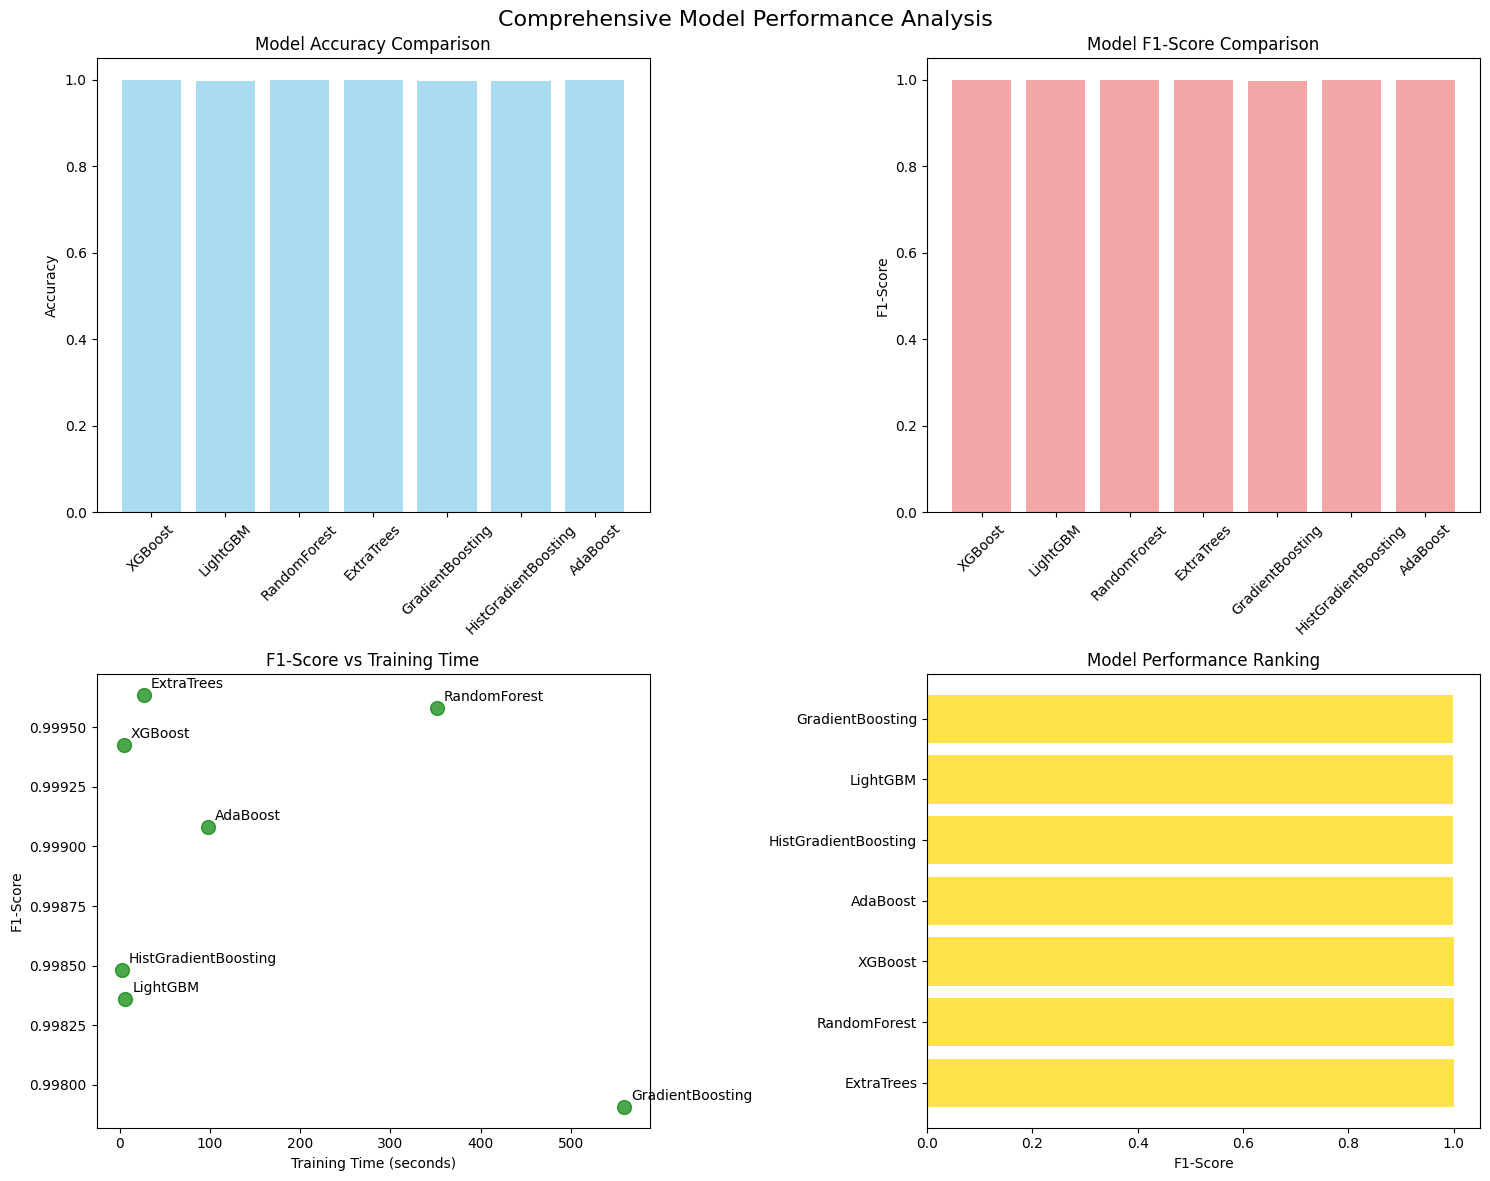

✓ Performance visualizations created successfully


In [ ]:
# Create comprehensive visualization
def create_performance_visualizations(results):
    """Generate performance comparison visualizations"""

    # Extract data for plotting
    model_names = list(results.keys())
    accuracies = [results[model]['accuracy'] for model in model_names]
    f1_scores = [results[model]['f1_score'] for model in model_names]
    training_times = [results[model]['training_time'] for model in model_names]

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comprehensive Model Performance Analysis', fontsize=16)

    # Accuracy comparison
    axes[0, 0].bar(model_names, accuracies, color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Model Accuracy Comparison')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # F1-Score comparison
    axes[0, 1].bar(model_names, f1_scores, color='lightcoral', alpha=0.7)
    axes[0, 1].set_title('Model F1-Score Comparison')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Training time vs F1-score scatter
    axes[1, 0].scatter(training_times, f1_scores, s=100, alpha=0.7, c='green')
    for i, model in enumerate(model_names):
        axes[1, 0].annotate(model, (training_times[i], f1_scores[i]),
                           xytext=(5, 5), textcoords='offset points')
    axes[1, 0].set_xlabel('Training Time (seconds)')
    axes[1, 0].set_ylabel('F1-Score')
    axes[1, 0].set_title('F1-Score vs Training Time')

    # Performance ranking
    performance_ranking = sorted(zip(model_names, f1_scores), key=lambda x: x[1], reverse=True)
    ranked_models, ranked_scores = zip(*performance_ranking)

    axes[1, 1].barh(range(len(ranked_models)), ranked_scores, color='gold', alpha=0.7)
    axes[1, 1].set_yticks(range(len(ranked_models)))
    axes[1, 1].set_yticklabels(ranked_models)
    axes[1, 1].set_xlabel('F1-Score')
    axes[1, 1].set_title('Model Performance Ranking')

    plt.tight_layout()
    plt.show()

# Generate visualizations
create_performance_visualizations(results)

print("✓ Performance visualizations created successfully")


In [ ]:
import pickle

def save_results_and_models(results, best_model_name, output_dir="output/"):
    """Save trained models and results"""
    import os
    os.makedirs(output_dir, exist_ok=True)

    # Save performance summary
    performance_summary.to_csv(f"{output_dir}model_comparison_results.csv", index=False)

    # Save best model
    if 'final_model' in locals():
        with open(f"{output_dir}best_model_optimized.pkl", 'wb') as f:
            pickle.dump(final_model, f)
        print("✓ Optimized model saved")
    else:
        with open(f"{output_dir}best_model.pkl", 'wb') as f:
            pickle.dump(results[best_model_name]['model'], f)
        print("✓ Best model saved")

    # Save feature importance
    if 'feature_importance' in locals():
        feature_importance.to_csv(f"{output_dir}feature_importance.csv", index=False)
        print("✓ Feature importance saved")

    print(f"✓ All results saved to {output_dir}")

# Save everything
save_results_and_models(results, best_model_name)

print("✓ Project completed successfully!")


✓ Best model saved
✓ All results saved to output/
✓ Project completed successfully!
